<a href="https://colab.research.google.com/github/henrygas/tensorflow_2_learn/blob/master/tensorflow_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt
%matplotlib inline

tf.logging.set_verbosity(tf.logging.INFO)
print(tf.__version__)

1.15.0-rc3


In [0]:
mnist = input_data.read_data_sets("./")

print(mnist.train.images.shape)
print(mnist.train.labels.shape)

print(mnist.validation.images.shape)
print(mnist.validation.labels.shape)

print(mnist.test.images.shape)
print(mnist.test.labels.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(55000, 784)
(55000,)
(5000, 784)
(5000,)
(10000, 784)
(10000,)


可以看到images里面有数量不等的图片，每张图片是28$\times$28长度的一维向量，所以用的时候需要将它转化为28$\times$28的图片。labels中则是图片对应的数字的值。

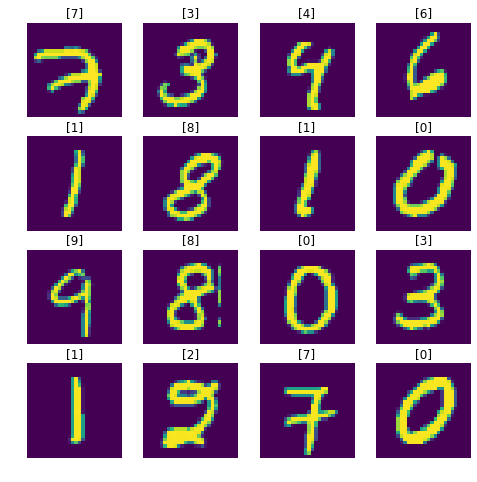

In [0]:
plt.figure(figsize=(8, 8))

for idx in range(16):
  plt.subplot(4, 4, idx + 1)
  plt.axis("off")
  plt.title("[{}]".format(mnist.train.labels[idx]))
  plt.imshow(mnist.train.images[idx].reshape((28, 28)))

接下来，定义用于训练的网络，首先定义网络的输入。
<br/><br/>
这里我们直接使用上面的数据作为输入，所以定义两个placeholder分别用于图像和label数据，另外，定义一个float类型的变量用于设置学习率。
<br/><br/>
为了让网络更高效的运行，多个数据会被组织成一个batch送入网络，两个placeholder的第一个维度就是batchsize，因为我们这里还没有确定batchsize，所以第一个维度留空。

In [0]:
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("int64", [None])
learning_rate = tf.placeholder("float")

In [0]:
def initialize(shape, stddev=0.1):
  return tf.truncated_normal(shape, stddev=0.1)

L1_units_count = 100
W_1 = tf.Variable(initialize([784, L1_units_count]))
b_1 = tf.Variable(initialize([L1_units_count]))
